In [1]:
## import libraries

! pip install pandas

In [2]:
! pip install numpy
! pip install matplotlib

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 12.3 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 11.4 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 11.1 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 10.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------------------- ------- 2.1/2.6 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 8.2 MB/s eta 0:00:00


In [3]:
! pip install seaborn

In [6]:
! pip install openpyxl

In [25]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_1 = pd.read_excel(r"C:\Users\ajha2\Downloads\Python\Sales_Dataset\Restaurant_Data.xlsx",sheet_name='Orders')
data_2 = pd.read_excel(r"C:\Users\ajha2\Downloads\Python\Sales_Dataset\Restaurant_Data.xlsx",sheet_name='Items')

data=pd.merge(data_1,data_2,on='Item')
data.head(2)


,Date,Time,Order Number,Item,Count,Category,Sub Category,Item Name,Price,Cost
0,2022-01-01,00:00:00,2200001,106,1,Appetizers,Appetizer Platters,Bruschetta,15,12.15
1,2022-01-01,00:00:00,2200001,206,1,Main Courses,Poultry,Turkey Dishes,181,146.61


In [33]:
data['Item'].value_counts()

Item
104    1556
100    1495
106    1489
101    1474
108    1465
       ... 
209     748
217     748
201     747
211     735
212     694
Name: count, Length: 71, dtype: int64

In [24]:
#we need to analyze and describe data
def Count_values(df,column_names):
    #Dictonary to store value counts for each column
    value_counts_dict = {}

    #itreate 
    for column in column_names:
        value_counts_dict[column]=df[column].value_counts()

    return value_counts_dict

#list columns
columns_to_counts= ['Item','Count','Category','Sub Category','Item Name']

result = Count_values(data,columns_to_counts)

for column,counts in result.items():
    print(f"Value counts for column '{column}':\n{counts}\n")



Value counts for column 'Item':
Item
104    1556
100    1495
106    1489
101    1474
108    1465
       ... 
209     748
217     748
201     747
211     735
212     694
Name: count, Length: 71, dtype: int64

Value counts for column 'Count':
Count
1    71505
0     1495
Name: count, dtype: int64

Value counts for column 'Category':
Category
Appetizers      14600
Main Courses    14600
Sides           14600
Desserts        14600
Beverages       14600
Name: count, dtype: int64

Value counts for column 'Sub Category':
Sub Category
Seafood                 7352
Non-Alcoholic Drinks    6810
Alcoholic Drinks        6617
Appetizer Platters      4499
Potatoes                4146
Cakes                   3886
Bread                   3192
Vegetables              3143
Rice                    3078
Meat Dishes             3070
Vegan                   3062
Pasta                   3036
Fruits                  2974
Soups                   2969
Salads                  2915
Pies                    2891
Puddi

In [48]:
#Clean item names
def clean_item_name(item):
    if isinstance(item,str):
        return item.strip().title().replace(' ','-')
    return item
#Applying function
data['Item Name']=data['Item Name'].apply(clean_item_name)
data['Item Name']

0                Bruschetta
1             Turkey-Dishes
2        Grilled-Vegetables
3                       NaN
4                      Beer
                ...        
72995          Spring-Rolls
72996          Grilled-Fish
72997          French-Fries
72998           Fruit-Salad
72999               Whiskey
Name: Item Name, Length: 73000, dtype: object

In [65]:
## Calculate Gross profit
def Calculate_profit(row):
    return(row['Price']* row['Count']) - (row['Cost'] * row['Count'])

# Applying the function to each row
data['Profit'] = data.apply(Calculate_profit,axis=1)
data.head(2)

,Date,Order Number,Item,Count,Category,Sub Category,Item Name,Price,Cost,Profit
0,2022-01-01,2200001,106,1,Appetizers,Appetizer Platters,Bruschetta,15,12.15,2.85
1,2022-01-01,2200001,206,1,Main Courses,Poultry,Turkey-Dishes,181,146.61,34.39


In [64]:

data.drop('Time',axis=1,inplace=True)

In [105]:
#Advanced Sales Trend Analysis with Custom Functions
def monthly_sales(df):
    #Group data by year and month and sum sales
    return df.groupby(df['Date'].dt.month)['Price'].sum()

#Apply this function
monthly_sales_data=monthly_sales(data)
monthly_sales_data

Date
1     330830
2     300859
3     332106
4     324496
5     333417
6     323023
7     333608
8     332853
9     322379
10    334877
11    322216
12    335515
Name: Price, dtype: int64

In [77]:
# Monthly Average Order Value (AOV)

def monthly_aov(df):
    monthly_orders = df.groupby(df['Date'].dt.month)['Order Number'].nunique()
    total_sales= df.groupby(df['Date'].dt.month)['Price'].sum()
    return total_sales / monthly_orders

#Apply Functions
monthly_aov_data = monthly_aov(data)
monthly_aov_data_1 =pd.DataFrame(monthly_aov_data,columns=['Average_Order_Value'])
monthly_aov_data_1



,Average_Order_Value
Date,
1,266.798387
2,268.624107
3,267.827419
4,270.413333
5,268.884677
6,269.185833
7,269.038710
8,268.429839
9,268.649167


In [83]:
# Advanced Profitability Analysis
def classify_profit(profit):
    if profit > 10:
        return 'High-Profit'
    elif 0 < profit <= 10:
        return 'Low-Profit'
    else:
        return 'No-Profit'
    
data['Profit_Category'] = data['Profit'].apply(classify_profit)


Profit_Category
Low-Profit     55887
High-Profit    15618
No-Profit       1495
Name: count, dtype: int64

In [94]:
#Create Price Bands
data['Price_Brand']=pd.cut(data['Price'], bins=[0,50,100,200],labels=['Low-Price','Medium-Price','High-Price'])
data.Price_Brand.value_counts()


Price_Brand
Low-Price       50053
High-Price      14600
Medium-Price     6852
Name: count, dtype: int64

In [101]:
# Calculate RFM Metrics
#function to calculate

def calculate_rfm(df):
    now = pd.Timestamp('2024-10-24')

    #Recency
    recency = (now- df['Date'].max()).days

    #frequency
    frequency=df['Order Number'].nunique()

    #Monetary
    monetary = df['Price'].sum()
    return pd.Series([recency,frequency,monetary], index=['Recency','Frequency','Monetary'])

#Applying the function to each customer
rfm_data = data.groupby('Order Number').apply(calculate_rfm)
rfm_data


C:\Users\ajha2\AppData\Local\Temp\ipykernel_24532\3337882544.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rfm_data = data.groupby('Order Number').apply(calculate_rfm)


,Recency,Frequency,Monetary
Order Number,,,
2200001,1027,1,308
2200002,1027,1,262
2200003,1027,1,305
2200004,1027,1,315
2200005,1027,1,254
...,...,...,...
2214596,663,1,296
2214597,663,1,275
2214598,663,1,246


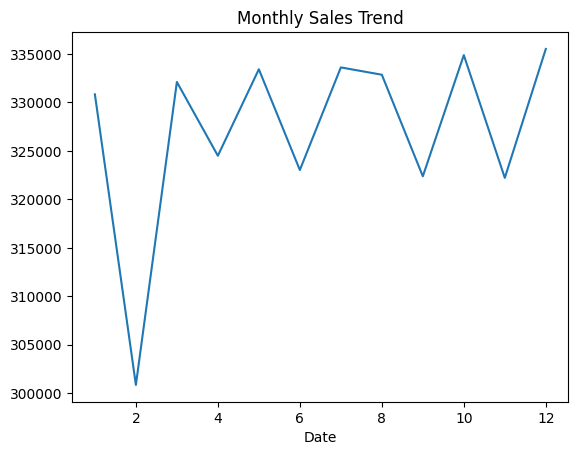

In [107]:
#Plot sales trend
sns.lineplot(x=monthly_sales_data.index,y=monthly_sales_data.values)
plt.title('Monthly Sales Trend')
plt.show()

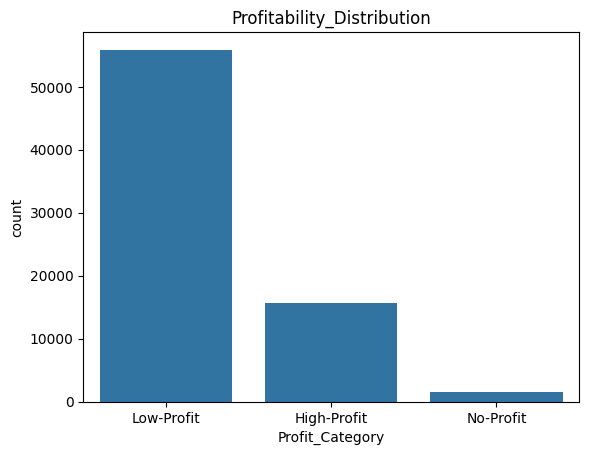

In [108]:
sns.countplot(x='Profit_Category',data=data)
plt.title('Profitability_Distribution')
plt.show()